# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

import joblib

import warnings
warnings.filterwarnings("ignore")

In [26]:
# Load the dataset
data_df = pd.read_csv("../Dataset/Scraped_Dataset.csv")
data_df.head()

,review,label
0,"not bad stay pretty pleasant, alarm going 3 no...",POSITIVE
1,westin times square cheats customer starwood p...,NEGATIVE
2,good news/ bad news seattle just night opted l...,POSITIVE
3,expectations booked riu bambu online having st...,NEGATIVE
4,hospital stayed 2 weeks got sick stomach upset...,NEGATIVE


# EXPLORATORY DATA ANALYSIS

In [27]:
# Function to visualize distribution of "Positive" and "Negative" reviews
def plot_label_counts(data_df, dist=1000):
    label_counts = data_df['label'].value_counts()
    plt.figure(figsize=(8, 6))
    label_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7, edgecolor='black')

    plt.xlabel('label', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Comparison of Positive and Negative Labels', fontsize=16)

    for index, value in enumerate(label_counts):
        plt.text(index, value + dist, str(value), ha='center', fontsize=12)

    plt.show()

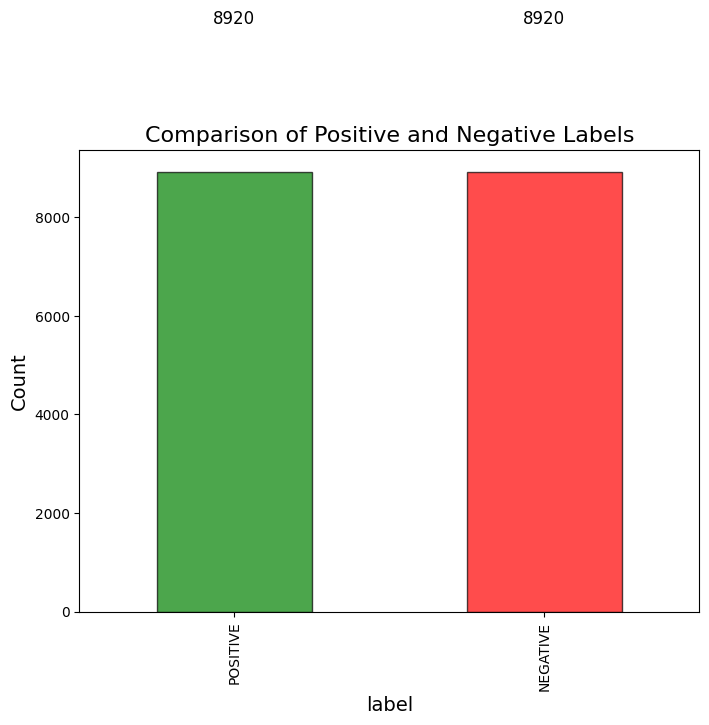

In [28]:
# Visualize distribution
plot_label_counts(data_df, 3000)

# DATA PREPARATION

In [29]:
# Encoding labels
label_enc = LabelEncoder()
y = label_enc.fit_transform(data_df.label.values)
y

array([1, 0, 1, ..., 1, 1, 0])

In [30]:
# Save the TF-IDF vectorizer
joblib.dump(label_enc, '../artifacts/NPN_Label_Encoder.pkl')

['../artifacts/NPN_Label_Encoder.pkl']

In [31]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(data_df.review, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14272,), (3568,), (14272,), (3568,))

In [32]:
# Creating feature vector
tfv = TfidfVectorizer(min_df=3, strip_accents='unicode', token_pattern=r'\w{1,}', ngram_range=(1, 3), sublinear_tf=True, stop_words = 'english')

In [33]:
# Fit the TFIDF vectorizer on the training data
tfv.fit(X_train)

TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [34]:
# Transform the training and test data
X_train_tfv = tfv.transform(X_train)
X_test_tfv = tfv.transform(X_test)

In [35]:
# Save the TF-IDF vectorizer
joblib.dump(tfv, '../artifacts/NPN_TF_IDF_Vectorizer.pkl')

['../artifacts/NPN_TF_IDF_Vectorizer.pkl']

# MODEL

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# Fit the Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train_tfv, y_train)

LogisticRegression()

In [38]:
# Predict on the test set
y_pred = model1.predict(X_test_tfv)

In [39]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [40]:
# Save the model
joblib.dump(model1, '../artifacts/NPN_Logistic_Regression_Model.pkl')

['../artifacts/NPN_Logistic_Regression_Model.pkl']

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [42]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8932

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1798
           1       0.89      0.90      0.89      1770

    accuracy                           0.89      3568
   macro avg       0.89      0.89      0.89      3568
weighted avg       0.89      0.89      0.89      3568



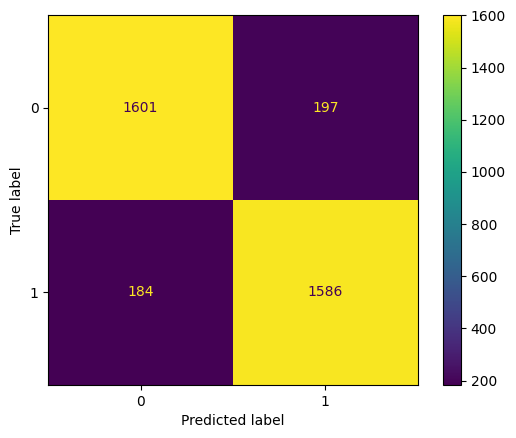

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.viridis)
plt.show()

In [44]:
# Probabilities
y_prob = model1.predict_proba(X_test_tfv)[:, 1]

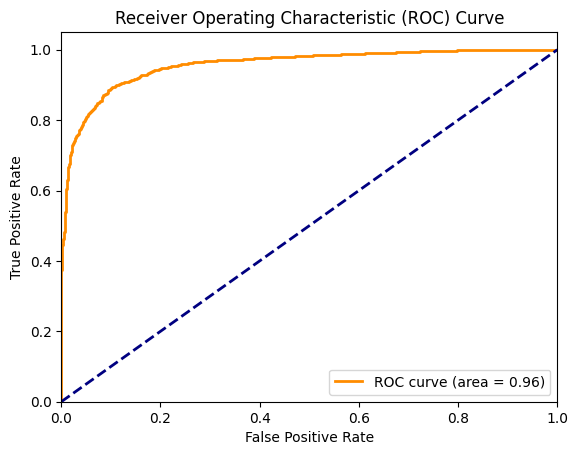

In [45]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# SAMPLE PREDICTIONS

In [ ]:
# Sample predictions from the dataset
num_samples = 10

# Randomly select indices from the test set
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)

# Get sample data based on the random indices
X_sample = X_test.iloc[random_indices]
y_sample_true = y_test[random_indices]
y_sample_pred = y_pred[random_indices]

# Create a DataFrame to display results
sample_df = pd.DataFrame({
    'Review': X_sample,
    'True Label': label_enc.inverse_transform(y_sample_true),
    'Predicted Label': label_enc.inverse_transform(y_sample_pred)
})

print("Sample Predictions:")
print(sample_df)

In [23]:
# Sample custom prediction
sample_review = ["Rooms are not clean enough. TV non functional. Big water heater is dead. Room service is there but the attendant is unprofessional."]
sample_review_tfv = tfv.transform(sample_review)
sample_pred = model1.predict(sample_review_tfv)
sample_pred_label = label_enc.inverse_transform(sample_pred)

print(f'Sample Review: "{sample_review[0]}"')
print(f'Predicted Sentiment: {sample_pred_label[0]}')

Sample Review: "Rooms are not clean enough. TV non functional. Big water heater is dead. Room service is there but the attendant is unprofessional."
Predicted Sentiment: NEGATIVE
